## TALLER 8

In [55]:

import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from pandas_profiling import ProfileReport
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df = pd.read_csv('Position_Salaries.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [56]:
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values
y = y.reshape(len(y),1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_y.fit_transform(y)

In [57]:
regr_poly = svm.SVR(kernel='poly',C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
regr_line = svm.SVR(kernel='linear', C=100, gamma='auto')
regr_rbf = svm.SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
regr_poly.fit(X.reshape(-1, 1), Y)
regr_line.fit(X.reshape(-1, 1), Y)
regr_rbf.fit(X.reshape(-1, 1), Y)

C:\Users\Julian\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Julian\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Julian\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(C=100, gamma=0.1)

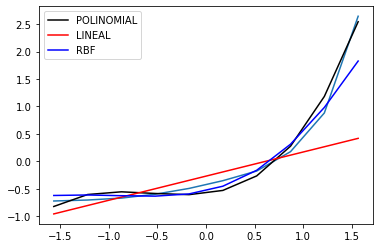

In [58]:
ypred_rbf    = regr_rbf.predict(X.reshape(-1, 1))
val_pred_rbf = sc_X.inverse_transform(ypred_rbf)
ypred_line    = regr_line.predict(X.reshape(-1, 1))
val_pred_line      = sc_X.inverse_transform(ypred_line)
ypred_poly    = regr_poly.predict(X.reshape(-1, 1))
val_pred_poly = sc_X.inverse_transform(ypred_poly)

plt.plot(X, Y)
plt.plot(X, regr_poly.predict(X.reshape(-1, 1)), label='POLINOMIAL', color = "black")
plt.plot(X, regr_line.predict(X.reshape(-1, 1)), label='LINEAL', color = "red")
plt.plot(X, regr_rbf.predict(X.reshape(-1, 1)), label='RBF', color = "blue")

plt.legend();

## SVR PLOTS

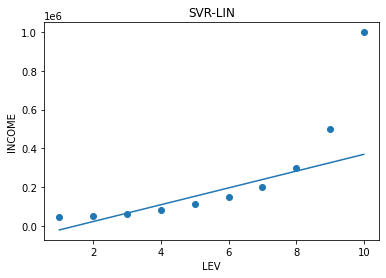

In [59]:

plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(Y))
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regr_line.predict(X)))
plt.title('SVR-LIN')
plt.xlabel('LEV')
plt.ylabel('INCOME')
plt.show()

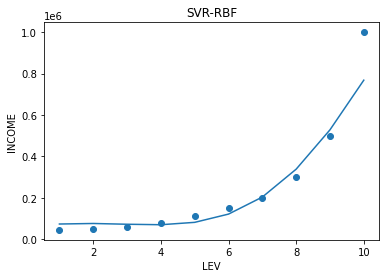

In [60]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(Y))
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regr_rbf.predict(X)))
plt.title('SVR-RBF')
plt.xlabel('LEV')
plt.ylabel('INCOME')
plt.show()

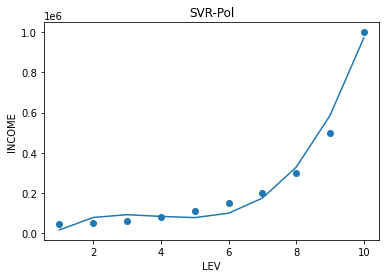

In [62]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(Y))
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regr_poly.predict(X)))
plt.title('SVR-Pol')
plt.xlabel('LEV')
plt.ylabel('INCOME')
plt.show()

## COMPARATIVO PREDICION 

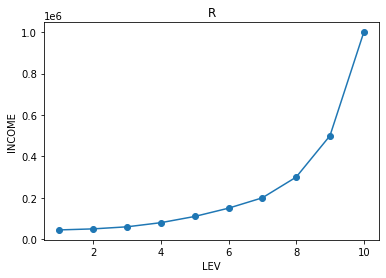

1.0


In [65]:
regressor = DecisionTreeRegressor(criterion='mae', max_features='log2',random_state = 0)
regressor.fit(X, Y)
ypred    = regressor.predict(X.reshape(-1, 1))
val_pred = sc_X.inverse_transform(ypred)
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(Y))
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)))
plt.title('R')
plt.xlabel('LEV')
plt.ylabel('INCOME')
plt.show()
print(r2_score(Y, ypred))